In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In /Users/Kobi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Kobi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Kobi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/Kobi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Kobi/miniconda3/lib/python3.7/site-packages/matplo

In [4]:
sheet_names = [f"VAPOR PRESSURE No.{i+1}" for i in range(5)]
dfs = [pd.read_excel(
    "../data/solvent_vapor_pressures_cosmo.xlsx",
    skiprows=0, 
    header=1,
    nrows=16, 
    sheet_name=sheet_name)
    for sheet_name in sheet_names
]

In [28]:
def remove_frame(ax, sides=["top", "left", "right"]):
    for side in sides:
        ax_side = ax.spines[side]
        ax_side.set_visible(False)

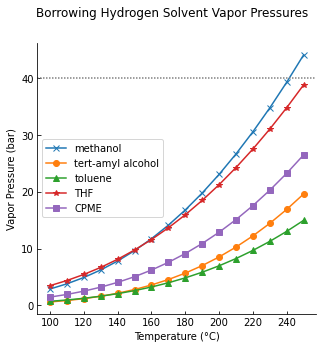

In [39]:
fig, ax = plt.subplots(1, figsize=(5,5))
solvents = ["methanol", "tert-amyl alcohol", "toluene", "THF", "CPME"]
markers = ["x", "o", "^", "*", "s"]
for i, df in enumerate(dfs):
    temp_deg_c = df["T"] - 273.15
    pressure_bar = df["PVtot"]/1000
    ax.plot(temp_deg_c, pressure_bar, label=solvents[i], marker=markers[i])
ax.legend()
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Vapor Pressure (bar)")
remove_frame(ax, sides=["top", "right"])
ax.tick_params(direction="in")
ax.axhline(40, dashes=[1, 1], c="grey")
fig.suptitle("Borrowing Hydrogen Solvent Vapor Pressures")
fig.savefig("figures/solvent_vapor_pressures.png", dpi=300)
